In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import oo, Symbol, integrate, exp, Piecewise
from sympy.functions.special.delta_functions import Heaviside

plt.rcParams['text.usetex'] = True

## HW3 - 2.a

### Solution

In [2]:
t = Symbol("t", real=True)

f = exp(-t)*Heaviside(t, 1)
g = Heaviside(t+2, 1) - Heaviside(t, 1)

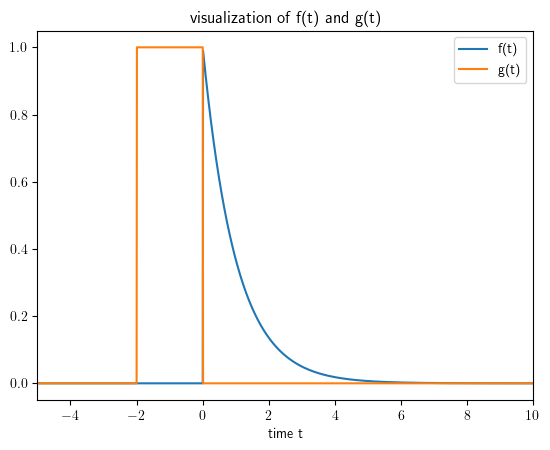

In [3]:
x = np.arange(-5, 10, 0.01)
fvals = [f.subs(t, val) for val in x]
gvals = [g.subs(t, val) for val in x]
plt.plot(x, fvals, label='f(t)')
plt.plot(x, gvals, label='g(t)')
plt.legend()
plt.xlabel("time t")
plt.xlim(-5, 10)
plt.title(r"visualization of f(t) and g(t)")
plt.show()

Convolution

In [4]:
def convolve(f, g, t, lower_limit=-oo, upper_limit=oo):
    tau = Symbol(r'\tau', real=True)
    expr = f.subs(t, tau) * g.subs(t, t - tau)
    expr = expr.rewrite(Piecewise)
    return integrate(expr, (tau, lower_limit, upper_limit))

In [5]:
p = convolve(f, g, t)

Final plot

In [6]:
x = np.arange(-5, 10, 0.01)
fvals = [f.subs(t, val) for val in x]
gvals = [g.subs(t, val) for val in x]
pvals = [p.subs(t, val) for val in x]

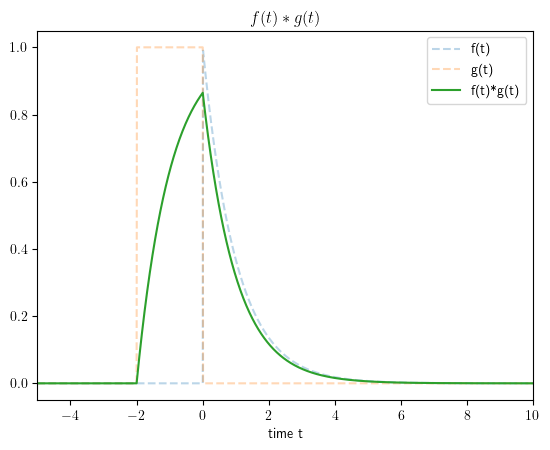

In [7]:
plt.plot(x, fvals, '--', label='f(t)', alpha=0.3)
plt.plot(x, gvals, '--', label='g(t)', alpha=0.3)
plt.plot(x, pvals, label='f(t)*g(t)')
plt.legend()
plt.xlabel("time t")
plt.xlim(-5, 10)
plt.title("$f(t)*g(t)$")
plt.show()

### More details

Let's plot g(-tau)

In [8]:
t = Symbol("t", real=True)

f = exp(-t)*Heaviside(t, 1)
g = Heaviside(t+2, 1) - Heaviside(t, 1)

In [9]:
tau = Symbol("tau", real=True)
g_flipped = g.subs(t, -tau)

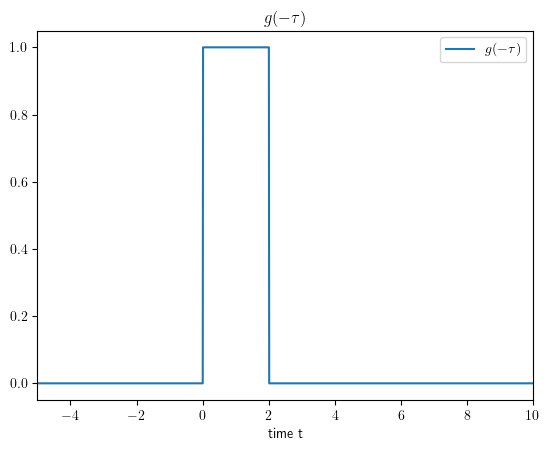

In [10]:
x = np.arange(-5, 10, 0.01)
g_flippedvals = [g_flipped.subs(tau, val) for val in x]
plt.plot(x, g_flippedvals, label=r'$g(-\tau)$')
plt.legend()
plt.xlabel("time t")
plt.xlim(-5, 10)
plt.title(r'$g(-\tau)$')
plt.show()

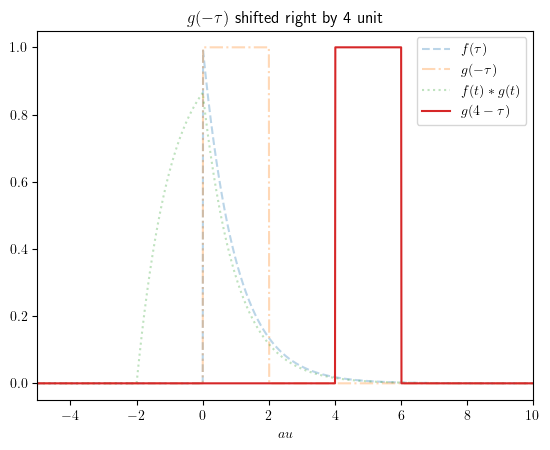

In [11]:
tval = 4
g_flipped_shifted = g_flipped.subs(tau, tau - tval)

x = np.arange(-5, 10, 0.01)
g_flipped_shiftedvals = [g_flipped_shifted.subs(tau, val) for val in x]
plt.plot(x, fvals, '--', label=r'$f(\tau)$', alpha=0.3)
plt.plot(x, g_flippedvals, linestyle='dashdot', alpha=0.3, label=r'$g(-\tau)$')
plt.plot(x, pvals, linestyle='dotted', alpha=0.3, label='$f(t)*g(t)$')
plt.plot(x, g_flipped_shiftedvals, label=fr'$g({tval}-\tau)$')
plt.legend()
plt.xlabel("$\tau$")
direction = "right"
if tval < 0:
    direction = "left"
plt.title(fr'$g(-\tau)$ shifted {direction} by {abs(tval)} unit')
plt.xlim(-5, 10)
plt.show()

Integrate at time t=tval

In [12]:
tval = -1
g_flipped_shifted = g_flipped.subs(tau, tau - tval)

In [13]:
expr = f.subs(t, tau) * g_flipped_shifted
expr = expr.rewrite(Piecewise)
v_int = integrate(expr, (tau, tval, tval+2))

In [14]:
print(tval, float(v_int))

-1 0.6321205588285577


Do that for bunch of tvals, this is gonna be slow

In [15]:
tvals = np.arange(-5,10,0.01)
v_int_vals = []

for tval in tvals:
    g_flipped_shifted = g_flipped.subs(tau, tau - tval)
    expr = f.subs(t, tau) * g_flipped_shifted
    expr = expr.rewrite(Piecewise)
    v_int_vals.append(float(integrate(expr, (tau, tval, tval+2))))

Plot v_int_vals, should be the same as before

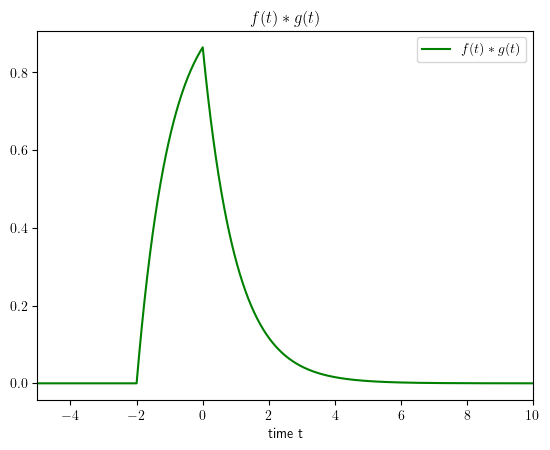

In [16]:
plt.plot(tvals, v_int_vals, label='$f(t)*g(t)$', color='g')
plt.legend()
plt.xlabel("time t")
plt.title(fr'$f(t)*g(t)$')
plt.xlim(-5, 10)
plt.show()

## Animation

In [17]:
t = Symbol("t", real=True)

f = exp(-t)*Heaviside(t, 1)
g = Heaviside(t+2, 1) - Heaviside(t, 1)

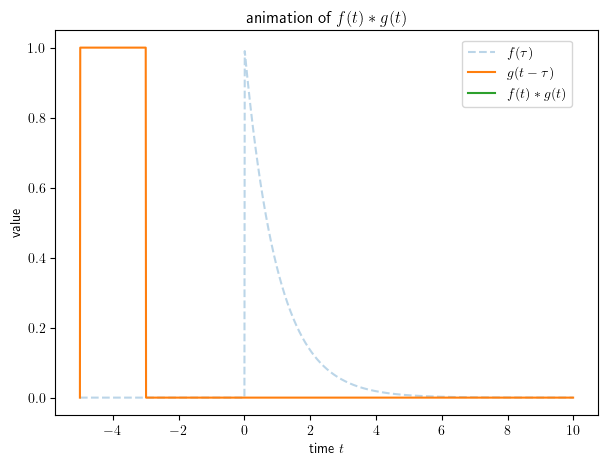

In [18]:
plt.rcParams["animation.html"] = "html5"
from matplotlib import animation

x = np.arange(-5, 10, 0.01)
fvals = [(f.subs(t, val)) for val in x]
tval = -5
g_flipped_shifted = g_flipped.subs(tau, tau - tval)
g_flipped_shiftedvals = [g_flipped_shifted.subs(tau, val) for val in x]

fig, ax = plt.subplots(figsize=(7,5))
line_f, = ax.plot(x, fvals, '--', label=r'$f(\tau)$', alpha=0.3)
line_flipped_g, = ax.plot(x, g_flipped_shiftedvals, label=fr'$g(t-\tau)$')

expr = f.subs(t, tau) * g_flipped_shifted
expr = expr.rewrite(Piecewise)
v_int_val = float(integrate(expr, (tau, tval, tval+2)))
conv_x = [tval]
conv_y = [v_int_val]
line_conv, = ax.plot(tval, v_int_val, label=fr'$f(t)*g(t)$')
ax.legend()
ax.set_ylabel("value")
ax.set_xlabel(r"time $t$")
ax.set_title("animation of $f(t)*g(t)$")
ax.legend(bbox_to_anchor=(.75, .8), loc=(0., 0.))

step_size = 0.1
start = -5
stop = 8
ttimes = np.arange(start, stop, step_size)

def init():
    conv_x = [tval]
    conv_y = [v_int_val]

def animate(ttime):
    ttime_calib = (stop-start)*ttime/len(ttimes)
    # print(ttime_calib)
    g_flipped_shifted = g_flipped.subs(tau, tau - (ttime_calib-5)) # shifted to origin
    g_flipped_shiftedvals = [g_flipped_shifted.subs(tau, val) for val in x]
    line_flipped_g.set_data(x, g_flipped_shiftedvals)
    
    conv_x.append(ttime_calib-5)
    expr = f.subs(t, tau) * g_flipped_shifted
    expr = expr.rewrite(Piecewise)
    conv_y.append(float(integrate(expr, (tau, ttime_calib-5, ttime_calib-5+2))))
    line_conv.set_data(conv_x, conv_y)
    
ani = animation.FuncAnimation(fig, animate, frames=len(ttimes))
# ani

In [19]:
from IPython import display

In [20]:
video = ani.to_html5_video() 
  
# embedding for the video 
html = display.HTML(video) 
  
# draw the animation 
display.display(html) 
plt.close() 

In [21]:
with open("hw3_q2a.html", "w") as f:
    print(ani.to_html5_video(), file=f)